In [83]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [84]:
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [85]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [86]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    # extracts file to housing path
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [87]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [88]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [89]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [90]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [91]:
housing.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


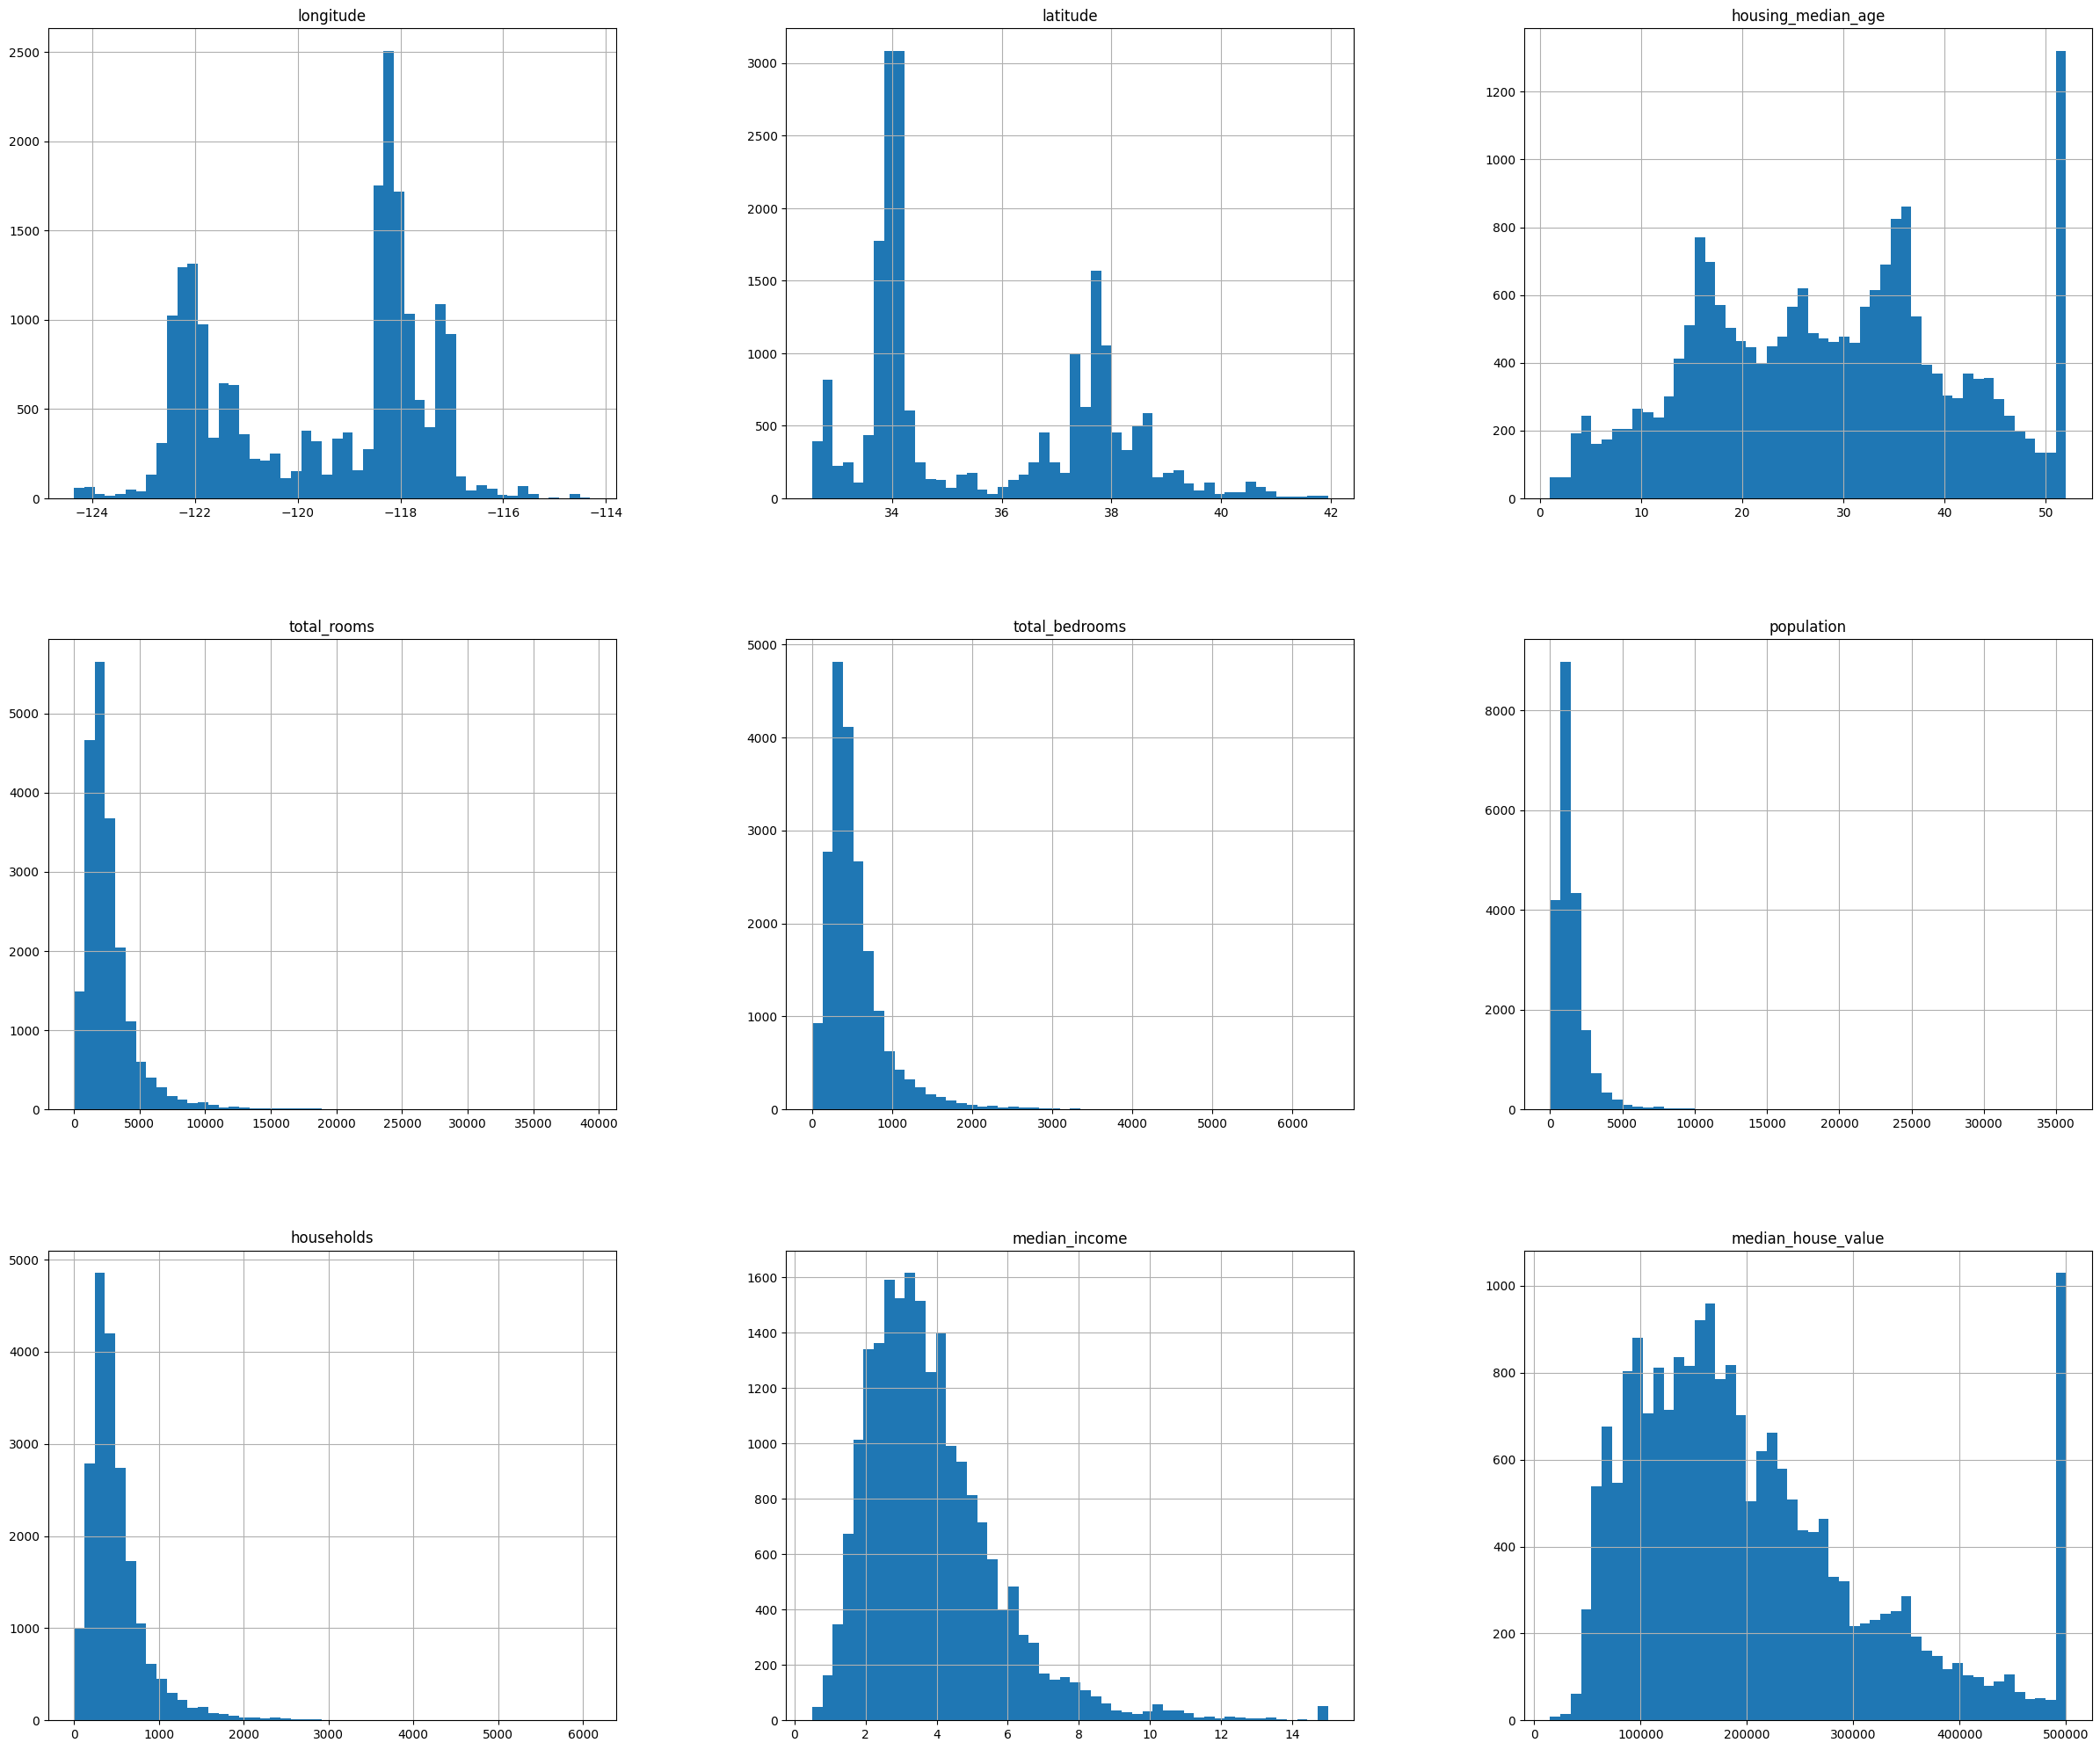

In [92]:
housing.hist(bins = 50, figsize = (30, 25))
plt.show()

In [93]:
# Considering the simple split train and test approach first
from sklearn.model_selection import train_test_split
trainSet, testSet = train_test_split(housing, test_size = 0.2, random_state = 420)

As some features are heavily clustered around several regions(eg., median_income), we can divide the the features' data into strata (homogenous subgroups), and sample the right number of instances representing the total population. This brings about a new type of split training and testing method known as Stratified Sampling.

In [94]:
# One should not have too many stratas even if they are all small in value. p
# The following code uses the pd.cut() function to create an income category attribute with 5 categories (labeled
# from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels = [1, 2, 3, 4, 5])

from sklearn.model_selection import StratifiedShuffleSplit
# Splits on the basis of income category into training and testing sets
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for trainIndex, testIndex in split.split(housing, housing["income_cat"]):
    stratTrainSet = housing.loc[trainIndex]
    stratTestSet = housing.loc[testIndex]

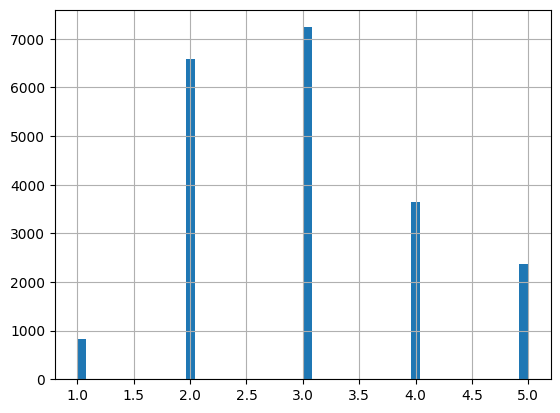

In [95]:
housing["income_cat"].hist(bins=50)
plt.show()

In [14]:
# Much easier to do this tbh
#strat_train_set, strat_test_set = train_test_split(
#    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

Checking the percentages of income categories in df

In [15]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Doing the same for test set to check how accurately stratas are selected

In [16]:
stratTestSet["income_cat"].value_counts() / len(stratTestSet)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Dropping the "income_cat" attribute now that it has done its job of performing stratified sampling based on it and such that the data returns to original form

In [17]:
for set in (stratTrainSet, stratTestSet):
    set.drop(["income_cat"], axis=1, inplace=True)

## Data Visualisation
We will explore the dataset in more depth with this step. Normally, if the training set is large, one can sample an exploration set which can make things fast. But, this train set is not that big, so one can just form a copy and start playing around with it. The data scientist can also play around with the visualisation parameters of the various plots that he will be using to make more patterns stand out!

In [18]:
housing = stratTrainSet.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

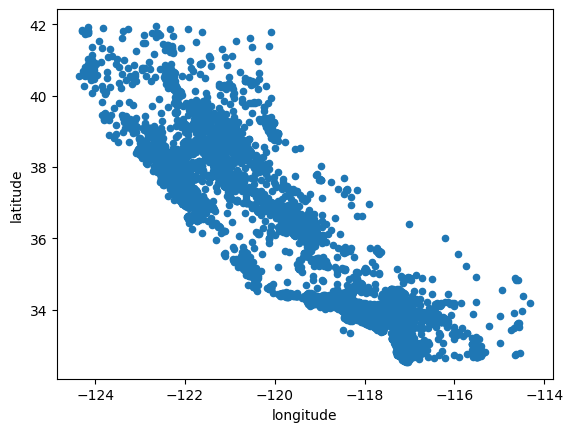

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude")

This does look like California!

<Axes: xlabel='longitude', ylabel='latitude'>

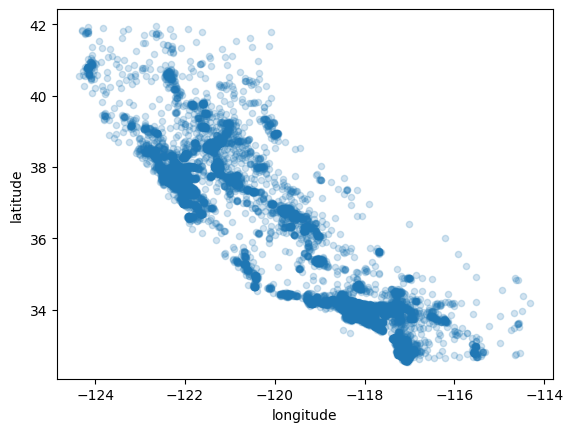

In [20]:
# Setting alpha param to 0.1 to make regions with higher density stand out
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

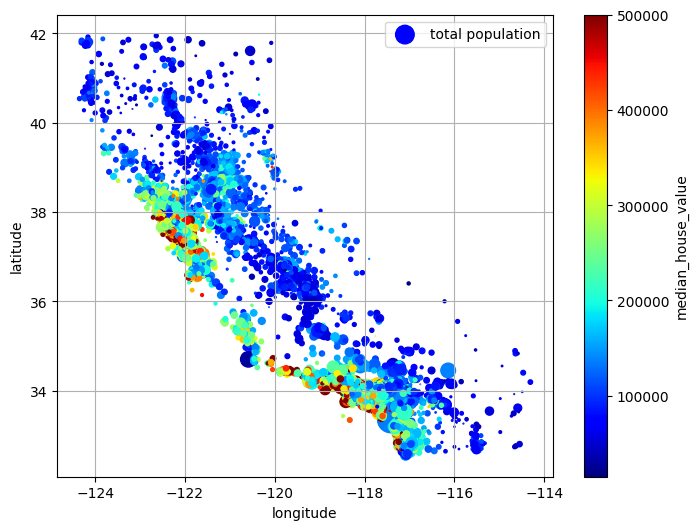

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="total population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             legend=True, sharex=False, figsize=(8,6))
# Created a colour map (jet here, which is predefined and shows the prices from low to high(blue to red)), the radius of each circle represents the 
# district's population
plt.show()

As the data is not too big, going to calculate the correlation coefficient(Pearson's) between every pair of attributes.

In [22]:
# Dropping Ocean Proximity as string values cannot be evaluated during calculating correlation coefficient.
housing = housing.drop(columns=["ocean_proximity"])
correlationMatrix = housing.corr()

In [23]:
correlationMatrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The high negative correlation values of latitude and longitude are attributed to the property prices going up as you go down near the coastal areas.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

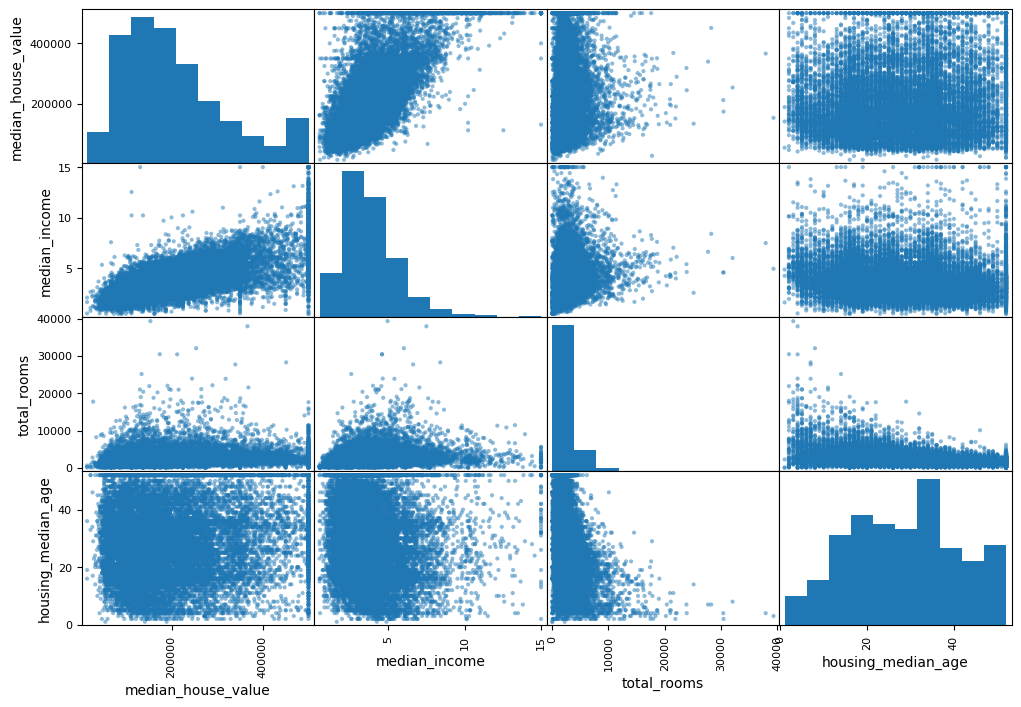

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

The main diagonal (top left to bottom right) would be full of straight lines if Pandas
plotted each variable against itself, which would not be very useful. So instead Pandas
displays a histogram of each attribute (other options are available; see Pandas’ docu‐
mentation for more details).

<Axes: xlabel='median_income', ylabel='median_house_value'>

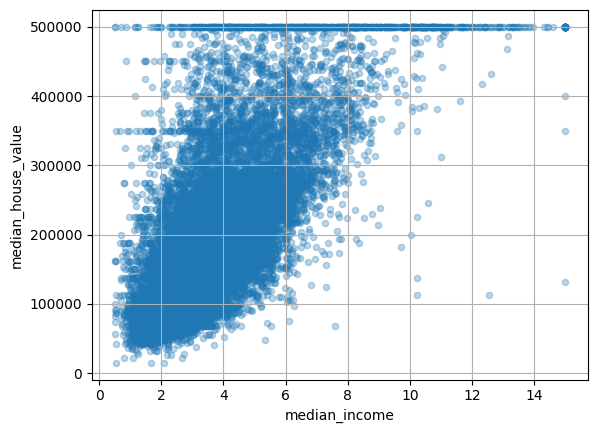

In [25]:
# Median income seems to be most correlated to the house value, so gonna zoom in there
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.3, grid=True)

There are a couple of less obvious horizontal lines here (450k, 350k, 280k) in the graph so these quirks may show up in our model as well- better to remove them when possible

### Experimenting with Attribute Combinations
The total number of rooms is not good enough to know to judge the house value if you dont know the number of households. Same for total bedrooms. Let's do some feature engineering(not sure actually if that is what i call it).

In [26]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]   # this seems like a stupid feature tbf

In [27]:
correlationMatrix = housing.corr()
correlationMatrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687151
rooms_per_household    0.146255
total_rooms            0.135140
housing_median_age     0.114146
households             0.064590
total_bedrooms         0.047781
population            -0.026882
longitude             -0.047466
latitude              -0.142673
bedrooms_per_room     -0.259952
Name: median_house_value, dtype: float64

~~Called it. stupid feature it is.~~ Was dividing by total households previously :/

This round of exploration does not have to be totally thorough- just start off the right foot and gain some insights here and there. Just have an understandably good first prototype- then analyze its output to gain more insights and come back to this step!

# Data Preparation
Better to create functions to prepare ur data for ml algorithms- this will enhance reproducability for future projects, new datasets, work in live systems and see which combination of transformations works the best!

In [28]:
# Removing the label and reverting to a clean dataset once again
housing = stratTrainSet.drop("median_house_value", axis=1)
housingLabels = stratTrainSet["median_house_value"].copy()

## Data Cleaning
Gonna remove some missing data in features first!
We have generally three basic options to deal with missing data/ NaN values:
- Drop the NaN values in the feature
- Drop the column with NaN values
- Replace the NaN values with some value(median, zero, mean etc)
Let's create copies of `housing` df and work out each of these options by displaying rows which originally contained NaN values.

In [29]:
# Stores null indexes in boolean series(false for not NaN)
null_rows_idx = housing.isnull().any(axis=1)
# loc locates all the rows containing NaN values using the index obtained above, namely in total_bedrooms
housing.loc[null_rows_idx]
#null_rows_idx

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


In [30]:
# METHOD 1
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [31]:
# METHOD 2
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [32]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [33]:
# sklearn has a class called SimpleImputer to calculate various measurements
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Seperating the numerical attributes to use the `median` strategy as text attributes cannot be used in calculation

In [34]:
housing_num = housing.select_dtypes(include=[np.number])
#housing_num = housing.drop("ocean_proximity", axis=1)

In [35]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
# As some missing values might emerge in the pipeline which will be created soon, it's prudent to calculate the median for all features now
imputer.statistics_
# it is the same as manually computing the median for all column values
# housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
# Transforming the training set
X = imputer.transform(housing_num)

In [38]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [40]:
# Seeing the changes in training set, all NaN values have been replaced with the median in total_bedrooms
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [41]:
imputer.strategy

'median'

### Handling Text and categorical attributes
We left out handling `ocean_proximity` as it is a categorical attribute. Most ML models prefer working with numerical attributes, so we will encode the text categorical attribute's values to numerical values using `OrdinalEncoder` class

In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [44]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

An issue with ml algorithms is that they assume that two nearby values are more similar to each other than two distant values, but that's not true for categories that are not ordinal. To deal with this, we have **one-hot encoding**, which creates one binary attribute per category, which will be equal to 1 whenever its category is in the row(eg, when cat is "ISLAND", ISLAND binary attribute will be 1, others will be 0 and so on). This way, only one attribute will be equal to 1(hot) and others will be 0(cold). The new attributes are also called *dummy variables*.

The output after `fit_transform` will be a sparse matrix(SciPy).

In [46]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
# Can be decompressed in size to act like a dense NumPy array like this
housing_cat_onehot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

You can create custom transformers for your tasks such as custom cleanup operations or combining specific attributes if you want them to be seamlessly aligned and workable with pipelines(and more functionalities)

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room
        def fit(self, X, y=None):
            return self # nothing else to do
        def transform(self, X, y=None):
            rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
            population_per_household = X[:, population_idx] / X[:, households_idx]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
                return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]

attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attribute_adder.transform(housing.values)

This transformer has one hyperparameter, `add_bedrooms_per_room`, set to True by default. You can check whether adding this attribute will help your metrics or not.

Feel free to add a hyperparameter to gate any data preparation step you are not sure about. It makes for better reproducible code allowing for trying out of maximum combinations

### Feature Scaling
Need to do this as ML algos don't perform well when the input numerical attributes have very different scales. (eg: total rooms ranges from 6 to around 40k and median incomes 0 to 15). Scaling the target values is unnecessary mostly.
There are two of the most common methods:

**Min-max scaling**(normalization) shifts and rescales values so that they end up ranging from 0 to 1. `feature_range` hyperparam lets you choose a custom range


**Standardization** subtracts the mean value(standardized values have thus zero mean), and then it divides by standard deviation so that resulting distribution has unit variance. Standardization doesn't bound values to a specific range, which may be a problem for neural networks and other algos. Standardization, however, is also much less affected by outliers.

In [50]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_minmax_scaled = min_max_scaler.fit_transform(housing_num)

In [51]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

Adding more scaling methods

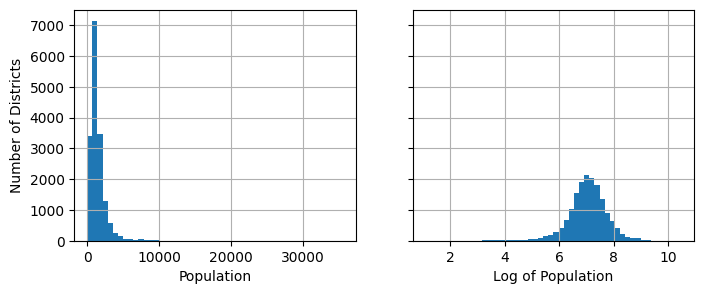

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[0].set_ylabel("Number of Districts")
axs[1].set_xlabel("Log of Population")
plt.show()

If we replace each value with its percentile, we get a uniform distribution.

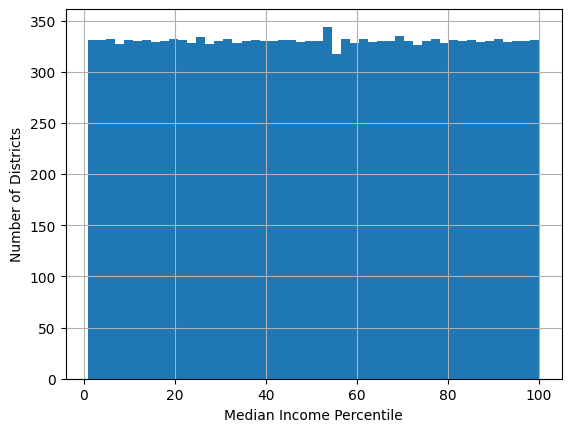

In [53]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1,100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median Income Percentile")
plt.ylabel("Number of Districts")
plt.show()

## Transformation Pipelines
There are many data transformation steps that need to be executed in the right order. We can use `Pipeline` class for this.

Below is an example for numerical attributes

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attributes_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

housing_num_transformed = num_pipeline.fit_transform(housing_num)

The `Pipeline` constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method)

It would be better to have a single transformer able to handle all columns(categorical and numerical both), applying all transformations to each column. This is possible with `ColumnTransformer` class.

In [55]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_num)
categorical_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), categorical_attributes),
]) # onehotencoder() returns a sparse matrix and num_pipeline returns a dense matrix(np matrix), 
# the result is a sparse matrix if the density of final matrix(ratio of non-0 cells) is lower than a threshold(0.3 by default),
# The result in this particular case is a dense matrix

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model
Will try out models which best suit the data now

### Training and Evaluating the training set


In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housingLabels) # bad formatting for label var

LinearRegression()

In [57]:
# Trying out the trained model on few instances from the training set
some_data = housing.iloc[:10]
some_labels = housingLabels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
# actual values
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089 206382.40770567 376422.05961781 266569.80764938
 151001.79721225  30119.48436056]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0]


Predictions are pretty off actually, even by 40% in some cases. Will evaluate the margin of error by RMSE.

In [58]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
linear_mse = mean_squared_error(housingLabels, housing_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_rmse

68627.87390018745

A margin error of nearly $69k is not good as for some, this might be all they could afford to buy a condo in CA. This constitutes as an example of model underfitting the training data- i.e., either the features do not provide enough information to make good predictions, or the model is not powerful enough. 
Going to try out picking a more powerful model now.

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housingLabels)

DecisionTreeRegressor()

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housingLabels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

wtd? no error at all- the model is probably overfitting now, let's try out cross validation(model validation) as a better means of evaluation

In [61]:
# Can also go with train_test_split to split the training set further into a smaller training and a validation set as a simplistic approach

# Going to use K-fold cross validation which divides the train set into 10 folds, using 1 for validation and other 9 for training for a total of 10 times(upto you)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housingLabels,
                         scoring="neg_mean_squared_error", cv=10)
# sklearn's cv features expect a utility function more than a cost function(a utility function is the negative of a loss/cost/error function in that you want to maximise the utility funcn for an algorithm and want it to be as greater as possible, which is why is is the opposite of MSE)
tree_rmse_scores = np.sqrt(-scores)

In [62]:
# Printing scores
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [73621.93048258 71492.11461227 69015.28586586 71428.64887929
 70481.8098233  77436.91350253 70749.99162888 74780.86701578
 68193.0789488  71116.73031363]
Mean:  71831.73710729166
Standard Deviation:  2612.928012313564


Seems like it was overfitting after alll. Cross validation not only allows us to get an estimate of the performance of the model, but how precise the estimate is as well(its standard deviation). It has a cv score of 71k, generally +-2619. This would not have been possible if you used only one validation set, though cross validation is also not possible every time if the data to be used in question is too big.

In [63]:
linear_scores = cross_val_score(lin_reg, housing_prepared, housingLabels,
                                scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180653


So Decision tree is performing even worse than linear regression in this case due to overfitting. Will try Random Forest now.

Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predicitons. Building a model on top of many other models is called `Ensemble Learning`, and it is often a good way to push Ml algorithms beyond their limits. 

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housingLabels)

RandomForestRegressor()

In [65]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housingLabels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18602.0295691993

In [66]:
# Cross-validation time
forest_scores = cross_val_score(forest_reg, housing_prepared, housingLabels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51248.1718372  49021.9611753  46620.98679443 51813.23411944
 47034.37397667 51854.58099383 52449.60068227 49823.73952123
 48725.88169991 53687.21673917]
Mean:  50227.97475394576
Standard Deviation:  2240.2071458895675


Much better actually. But the scores on training set is much lower than on validation sets, which means that the model is still overfitting. One can regularise the model(constrain it), simplify the model, or get more training data to deal with this.

We can also save our models by using Python's pickle module- it will save both the hyperparams and trained params as well as the cross-validation scores and perhaps the actualy predictions as well.
```
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")
```

### Testing out more models

In [67]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="sigmoid")
svm_reg.fit(housing_prepared, housingLabels)

SVR(kernel='sigmoid')

In [68]:
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housingLabels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118307.02156732576

In [69]:
from sklearn.naive_bayes import GaussianNB

nb_reg = GaussianNB()
nb_reg.fit(housing_prepared, housingLabels)

GaussianNB()

In [70]:
housing_predictions = nb_reg.predict(housing_prepared)
nb_mse = mean_squared_error(housingLabels, housing_predictions)
nb_rmse = np.sqrt(nb_mse)
nb_rmse

99972.67682483041

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

xgb_reg = GradientBoostingRegressor()
xgb_reg.fit(housing_prepared, housingLabels)

GradientBoostingRegressor()

In [72]:
housing_predictions = xgb_reg.predict(housing_prepared)
xgb_mse = mean_squared_error(housingLabels, housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

50651.5088944892

## Fine tuning the model
### Grid Search

In [73]:
from sklearn.model_selection import GridSearchCV

# grid search will first try out all possible combinations in the first dict(3x4=12) and then the hyperparam combinations in the second dict with the bootstrap hyperparam set to False this time(2x3=6)
param_grid = [
    #{'n_estimators': [30, 40, 50], 'max_features': [8, 10, 12, 14]}, improving on which combination works the best
    {'n_estimators': [50, 70, 90, 100], 'max_features': [8]},
    #{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2, 3, 4]}, same reason as above
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True, refit=True) # refit retrains the regressor on the whole training set once it finds the whole training set and it's good as feeding it more data will only improve its performance

grid_search.fit(housing_prepared, housingLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8],
                          'n_estimators': [50, 70, 90, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
grid_search.best_params_ # shows the best combination of parameters

{'max_features': 8, 'n_estimators': 100}

In [75]:
grid_search.best_estimator_ # get the best estimator directly

RandomForestRegressor(max_features=8)

In [76]:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults["mean_test_score"], cvresults["params"]):
    print(np.sqrt(-mean_score), params)

49543.051082433514 {'max_features': 8, 'n_estimators': 50}
49383.78633357428 {'max_features': 8, 'n_estimators': 70}
49424.147517391095 {'max_features': 8, 'n_estimators': 90}
49318.41294559408 {'max_features': 8, 'n_estimators': 100}


The RMSE score for the best hyperparameter combination is 49261 which is slightly better than our model's previous RMSE using the default hyperparameter values.

- Generally, Grid Search is good when we are exploring relatively few combinations, but when the hyperparameter search space is large, it is often preferred to use `RandomizedSearchCV` instead. It evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This means 1000 new values for each iteration if we run it for 1000 iterations.
- Another good way to fine-tune your system is to combine the models that perform the best as the group (or `"ensemble"`) will often perform better than the best individual models(like Random Forests perform better than individual Decision Trees they are made of)

## Analyzing the best models and their errors

In [77]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.98574740e-02, 6.37840235e-02, 4.31803041e-02, 1.58085191e-02,
       1.52442456e-02, 1.53096570e-02, 1.41052353e-02, 3.48368300e-01,
       5.99390836e-02, 1.12846092e-01, 6.29829786e-02, 7.43986752e-03,
       1.65789961e-01, 9.38696082e-05, 2.19687032e-03, 3.05351881e-03])

In [78]:
# Display feature importance scores next to their attribute names
extra_attribs = ["rooms_per_household", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.348368300057161, 'median_income'),
 (0.1657899612309345, 'INLAND'),
 (0.11284609172702796, 'pop_per_hhold'),
 (0.06985747396808556, 'longitude'),
 (0.06378402351726666, 'latitude'),
 (0.06298297857280151, 'bedrooms_per_room'),
 (0.05993908357747033, 'rooms_per_household'),
 (0.043180304079839686, 'housing_median_age'),
 (0.01580851908809742, 'total_rooms'),
 (0.015309657040987272, 'population'),
 (0.015244245622774561, 'total_bedrooms'),
 (0.014105235253194673, 'households'),
 (0.007439867517158376, '<1H OCEAN'),
 (0.003053518814571804, 'NEAR OCEAN'),
 (0.002196870324427791, 'NEAR BAY'),
 (9.386960820095701e-05, 'ISLAND')]

One can then drop some of the less useful features(like only one category of ocean_proximity is really useful, so can drop the others)

# Evaluate system on test set

In [79]:
final_model = grid_search.best_estimator_

X_test = stratTestSet.drop("median_house_value", axis=1)
y_test = stratTestSet["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) # DONT fit() on test setttt

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47202.1713926513

In some cases, it might not be enough to convince you or others to launch this model based on such a point estimate of the __generalization error__(which is the measure of how accurately an algorithm can predict outcome values for previously unseen data), as it might be just minutely better than the one currently in production. 

To get an idea about how precise this estimate is, we can calculate a 95% *confidence interval* for the generalisation error using the following snippet:
(PS: The confidence interval is the range of values that you expect your estimate to fall between a certain percentage of the time if you run your experiment again or re-sample the population in the same way.)

In [80]:
from scipy import stats
confidence = 0.95 # this value is most commonly used(0.99 comes next)
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc= squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
# sem is standard error mean, scale is used for scale as its name implies. not aware about loc so far

array([45227.75529083, 49097.25165135])

The performance will usually be slightly worse than when you measured it during cross-validation if you did a lot of hyperparameter tuning(because your system ends up being fine-tuned to perform well on validation data, and is still unaware about the patterns in unknown datasets).
Not the case in this example, but when this happens, one must resist the temptation to tweak the hyperparameters to make the numebrs look good on the test set. The improvements will be unlikely to generalize to newer data even then.

add solutions for exercises asap